In [2]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from electronfactors.model.utilities import *

In [3]:
width, length, eqPonA, factor = pull_data(energy=12)

In [8]:
def display_reference(reference):
    if reference is not(None):
        plt.figure()
        plt.scatter(width, eqPonA, s=50, alpha=0.2)
        plt.scatter(width[reference], eqPonA[reference], s=50)
        
        plt.figure()
        plt.scatter(width, length, s=50, alpha=0.2)
        plt.scatter(width[reference], length[reference], s=50)
    else:
        print("None")

In [107]:
def search_for_bad_data_sets(width, eqPonA, factor, amount=12, limit=1.5, n=1000):
    for i in range(n):       
        order = np.arange(len(width))
        np.random.shuffle(order)
        
        reference = order[0:amount]
        uncertainty = prediction_uncertainty(width[reference], eqPonA[reference], factor[reference])
        
        if uncertainty < limit:
            print(uncertainty)
            return reference

0.278158627157


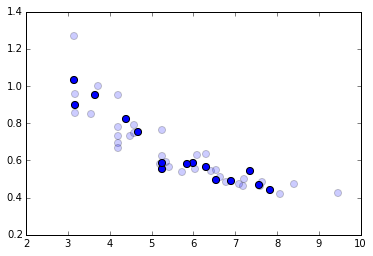

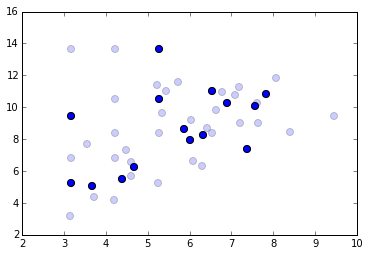

In [117]:
reference = search_for_bad_data_sets(width, eqPonA, factor, amount=15, limit=0.3, n=1000)
display_reference(reference)